/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/jiyang/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


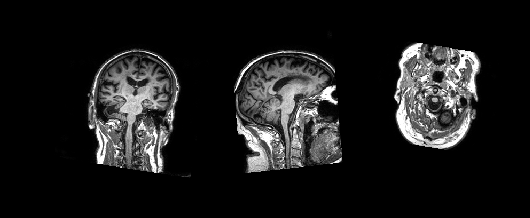

In [6]:
from nilearn.plotting import plot_anat
%matplotlib inline

plot_anat ('/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz',
          display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [4]:
%%bash

# Note %%bash must be in the first line to run bash shell in the current cell.

# BET in original framework running in bash

T1w_filename='/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz'
bet ${T1w_filename} /home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet

/home/jiyang/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


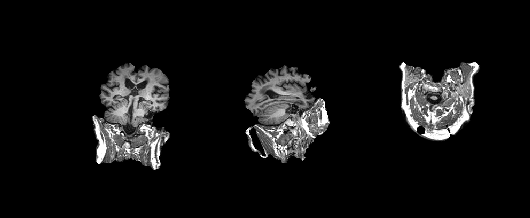

In [7]:
# visualise
plot_anat ('/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [8]:
# display all bet help info
!bet


Usage:    bet <input> <output> [options]

Main bet2 options:
  -o          generate brain surface outline overlaid onto original image
  -m          generate binary brain mask
  -s          generate approximate skull image
  -n          don't generate segmented brain image output
  -f <f>      fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
  -g <g>      vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
  -r <r>      head radius (mm not voxels); initial surface sphere is set to half of this
  -c <x y z>  centre-of-gravity (voxels not mm) of initial mesh surface.
  -t          apply thresholding to segmented brain image and mask
  -e          generates brain surface as mesh in .vtk format

Variations on default bet2 functionality (mutually exclusive options):
  (default)   just run bet2
  -R          robust brain centre estimation (iterates BE

In [9]:
%%bash

# bet with mask output
T1w_filename='/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz'
bet ${T1w_filename} /home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet -m

/home/jiyang/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/home/jiyang/.local/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


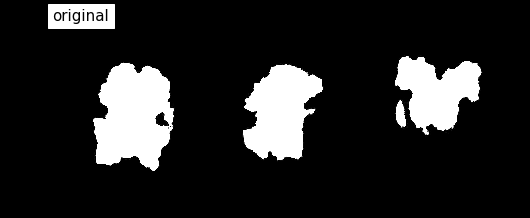

In [11]:
plot_anat ('/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet_mask.nii.gz', title = 'original',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [13]:
# BET in Nipype platform

from nipype.interfaces.fsl import BET

skullstrip = BET ()
skullstrip.inputs.in_file = '/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz'
skullstrip.inputs.out_file = '/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz'
skullstrip.run()

/home/jiyang/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


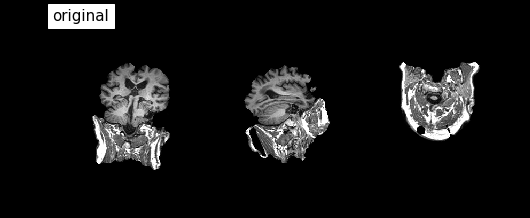

In [14]:
plot_anat ('/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz', title = 'original',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [15]:
print (skullstrip.cmdline)

bet /home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz /home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz


In [39]:
# another way to set inputs to interface is passing as key arguments
skullstrip = BET (in_file = '/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz',
                  out_file = '/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz',
                  frac = 0.7,
                  mask = True)
res = skullstrip.run()

/home/jiyang/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/home/jiyang/.local/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


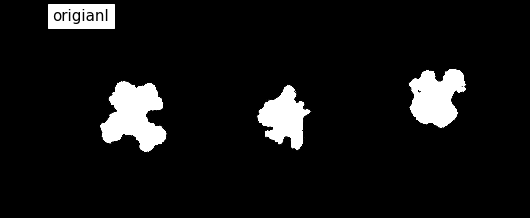

In [21]:
plot_anat ('/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet_mask.nii.gz', title = 'origianl',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [19]:
# See bet help function
BET.help()

Wraps the executable command ``bet``.

FSL BET wrapper for skull stripping

For complete details, see the `BET Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET/UserGuide>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> btr = fsl.BET()
>>> btr.inputs.in_file = 'structural.nii'
>>> btr.inputs.frac = 0.7
>>> btr.inputs.out_file = 'brain_anat.nii'
>>> btr.cmdline
'bet structural.nii brain_anat.nii -f 0.70'
>>> res = btr.run() # doctest: +SKIP

Inputs::

        [Mandatory]
        in_file: (an existing file name)
                input file to skull strip
                argument: ``%s``, position: 0

        [Optional]
        out_file: (a file name)
                name of output skull stripped image
                argument: ``%s``, position: 1
        outline: (a boolean)
                create surface outline image
                argument: ``-o``
        mask: (a boolean)
                create binary mask image
                argument: ``-m``
        skull: 

In [40]:
# the help function has 1) general explanation of the class, 2) input arguments, 3) output arguments
# below tried one of the output arguments
print (res.outputs.mask_file) # this is a bug !!!
print (res.outputs.out_file)
print (skullstrip.cmdline)

/home/jiyang/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/sub-2019A_T1w_bet_mask.nii.gz
/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz
bet /home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz /home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_bet.nii.gz -f 0.70 -m


In [24]:
#    interface errors
# =======================

# no arg passed to BET -> ValueError
skullstrip2 = BET()

try:
    skullstrip2.run()
except (ValueError) as err:
    print ("ValueError : ", err)
else:
    raise

ValueError :  BET requires a value for input 'in_file'. For a list of required inputs, see BET.help()


In [25]:
# passed unexpected arg type -> TraitError
try:
    skullstrip.inputs.mask = "mask.nii.gz"
except (Exception) as err:
    if "TraitError" in str(err.__class__):
        print ("TraitError", err)
    else:
        raise
else:
    raise

TraitError The 'mask' trait of a BETInputSpec instance must be a boolean, but a value of 'mask.nii.gz' <class 'str'> was specified.


In [26]:
# no such file -> TraitError
try:
    skullstrip.inputs.in_file = "/data/test.nii.gz"
except (Exception) as err:
    if "TraitError" in str(err.__class__):
        print ("TraitError", err)
    else:
        raise
else:
    raise

TraitError The trait 'in_file' of a BETInputSpec instance is an existing file name, but the path  '/data/test.nii.gz' does not exist.


In [42]:
# It turns out that BET even does not need you to specify out_file. Nipype will help you specify.
skullstrip = BET (in_file = '/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz') # this will save to cwd.
res = skullstrip.run()

In [43]:
print (res.outputs.out_file)
print (skullstrip.cmdline)

/home/jiyang/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/sub-2019A_T1w_brain.nii.gz
bet /home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz /home/jiyang/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/sub-2019A_T1w_brain.nii.gz


In [44]:
print (res.outputs)


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = <undefined>
meshfile = <undefined>
out_file = /home/jiyang/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/sub-2019A_T1w_brain.nii.gz
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>



In [45]:
# rerun with generating mask
res2 = skullstrip.run (mask = True)
print (res2.outputs)


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = /home/jiyang/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/sub-2019A_T1w_brain_mask.nii.gz
meshfile = <undefined>
out_file = /home/jiyang/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/sub-2019A_T1w_brain.nii.gz
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>



In [47]:
# IsotropicSmooth with FWHM = 4
from nipype.interfaces.fsl import IsotropicSmooth
isoSmth = IsotropicSmooth()
isoSmth.inputs.in_file = '/home/jiyang/Work/sub-2019A/anat/sub-2019A_T1w.nii.gz'
isoSmth.inputs.out_file = '/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_smooth.nii.gz'
isoSmth.inputs.fwhm = 4

res_isoSmth = isoSmth.run()

In [48]:
print (res_isoSmth.outputs)


out_file = /home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_smooth.nii.gz



/home/jiyang/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


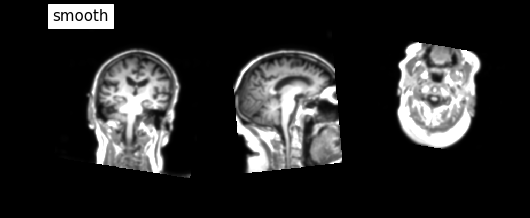

In [50]:
%matplotlib inline
from nilearn.plotting import plot_anat
plot_anat ('/home/jiyang/Work/sub-2019A/derivatives/sub-2019A_T1w_smooth.nii.gz', title = 'smooth',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)